In [121]:
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

Describa un algoritmo que determine en tiempo O(n**2 lg n) si existen tres puntos colineales de un
conjunto de n puntos dados.

In [122]:
def pendiente(p,q):
    dy = p[1]-q[1]
    dx = p[0]-q[0]
    if dx == 0:
        return 0
    else:
        return ((dy)*1.0)/((dx)*1.0)

def son_Colineales(p1,p2,p3):
    recta1 = pendiente(p1,p2)
    recta2 = pendiente(p2,p3)
    recta3 = pendiente(p1,p3)
    if recta1 == recta2 and recta2 == recta3 and recta1 == recta3:
        return True
    else:
        return False

In [123]:
#Tomado de: http://edupython.blogspot.com.co/2016/06/combinaciones-permutaciones-y-otras.html
def potencia(c):
    """
       Calcula y devuelve el conjunto potencia del 
       conjunto c.
    """
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]

def combinaciones(c, n):
    Elemento = []
    for s in potencia(c):
        if len(s) == n:
            if son_Colineales(s[n-1],s[n-2],s[n-3]):
                Elemento.append(s)
    return Elemento

los puntos colineales son
Punto: [(2, 4), (7, 4), (6, 4)]
Punto: [(4, 2), (7, 5), (6, 4)]
Punto: [(5, 0), (4, 2), (2, 6)]


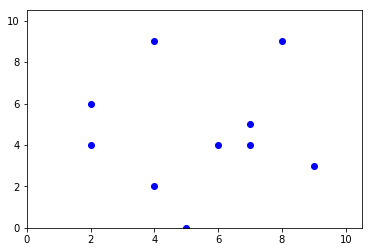

In [127]:
n = 10
x_coord = np.random.randint(n, size=n)
y_coord = np.random.randint(n, size=n)
# Make pairs
points = zip(x_coord,y_coord)

colineal = combinaciones(points,3)

if len(colineal) > 0:    
    # Plot points and convex hull
    print "los puntos colineales son"
    for i in colineal:
        print "Punto:",i
    plt.plot(x_coord, y_coord,'bo')
    plt.axis([-0.0, n+0.5, -0.0, n+0.5])
    plt.show()
else:
    print "No hay Puntos Colineales"

Dise˜ne un algoritmo que en tiempo O(n lg n) pueda determinar si un poligono definido por una
secuencia de n puntos es simple (sus segmentos no se intersectan entre si).